In [1]:
import iris
from iris import quickplot as qplt
import numpy as np
%matplotlib inline

/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
# !!mkdir /usr/local/share/notebooks/data/mogreps-gg
# !s3fs mogreps-g /usr/local/share/notebooks/data/mogreps-gg -o endpoint=eu-west-2 -o public_bucket=1

In [5]:
# !!mkdir /usr/local/share/notebooks/data/mogreps-uk
# !s3fs mogreps-uk /usr/local/share/notebooks/data/mogreps-uk -o endpoint=eu-west-2 -o public_bucket=1

In [4]:
g_cubes = iris.load('../data/mogreps-gg/prods_op_mogreps-g_20160107_00_00_003.nc')
print(g_cubes)

/opt/conda/lib/python3.5/site-packages/iris/fileformats/cf.py:1140: IrisDeprecation: NetCDF default loading behaviour currently does not expose variables which define reference surfaces for dimensionless vertical coordinates as independent Cubes. This behaviour is deprecated in favour of automatic promotion to Cubes. To switch to the new behaviour, set iris.FUTURE.netcdf_promote to True.
  warn_deprecated(msg)


0: wet_bulb_freezing_level_altitude / (m) (latitude: 600; longitude: 800)
1: wet_bulb_potential_temperature / (K) (time: 2; pressure: 3; latitude: 600; longitude: 800)
2: air_pressure_at_sea_level / (Pa)    (time: 2; latitude: 600; longitude: 800)
3: air_temperature / (K)               (latitude: 600; longitude: 800)
4: air_temperature / (K)               (latitude: 600; longitude: 800)
5: air_temperature / (K)               (latitude: 600; longitude: 800)
6: air_temperature / (K)               (time: 2; pressure: 16; latitude: 600; longitude: 800)
7: dew_point_temperature / (K)         (latitude: 600; longitude: 800)
8: fog_area_fraction / (1)             (latitude: 600; longitude: 800)
9: geopotential_height / (m)           (time: 2; pressure: 9; latitude: 600; longitude: 800)
10: high_type_cloud_area_fraction / (1) (latitude: 600; longitude: 800)
11: low_type_cloud_area_fraction / (1)  (latitude: 600; longitude: 800)
12: medium_type_cloud_area_fraction / (1) (latitude: 600; longitud

In [7]:
uk_cubes = iris.load('../data/mogreps-uk/prods_op_mogreps-uk_20160107_03_00_003.nc')
# print(uk_cubes)

/opt/conda/lib/python3.5/site-packages/iris/fileformats/cf.py:1140: IrisDeprecation: NetCDF default loading behaviour currently does not expose variables which define reference surfaces for dimensionless vertical coordinates as independent Cubes. This behaviour is deprecated in favour of automatic promotion to Cubes. To switch to the new behaviour, set iris.FUTURE.netcdf_promote to True.
  warn_deprecated(msg)


In [6]:
print(uk_cubes)

0: unknown_1 / (1)                     (-- : 3; grid_latitude: 548; grid_longitude: 421)
1: unknown_0 / (1)                     (time: 3; grid_latitude: 548; grid_longitude: 421)
2: cloud_base_altitude_assuming_only_consider_cloud_area_fraction_greater_than_2p5_oktas / (kft) (time: 4; grid_latitude: 548; grid_longitude: 421)
3: wet_bulb_potential_temperature / (K) (time: 4; pressure: 3; grid_latitude: 548; grid_longitude: 421)
4: stratiform_snowfall_rate / (kg m-2 s-1) (time: 36; grid_latitude: 548; grid_longitude: 421)
5: cloud_area_fraction_assuming_maximum_random_overlap / (1) (time: 4; grid_latitude: 548; grid_longitude: 421)
6: unknown_2 / (1)                     (time: 4; grid_latitude: 548; grid_longitude: 421)
7: unknown / (1)                       (time: 4; grid_latitude: 548; grid_longitude: 421)
8: wet_bulb_freezing_level_altitude / (m) (time: 3; grid_latitude: 548; grid_longitude: 421)
9: air_pressure_at_sea_level / (Pa)    (time: 4; grid_latitude: 548; grid_longitude: 421)

In [8]:
uk_pressure = uk_cubes[9]
uk_pressure = uk_pressure.extract(iris.Constraint(time=uk_pressure.coord('time').points[0]))

In [9]:
g_pressure = g_cubes[2]
g_pressure = g_pressure.extract(iris.Constraint(time=g_pressure.coord('time').points[1]))

In [10]:
glat = uk_pressure.coord('grid_latitude').points
glon = uk_pressure.coord('grid_longitude').points
x, y = np.meshgrid(glon, glat)
cs = uk_pressure.coord_system()
lons, lats = iris.analysis.cartography.unrotate_pole(x, y, cs.grid_north_pole_longitude, cs.grid_north_pole_latitude)
clons = iris.coords.DimCoord(lons[0,:], standard_name='longitude', var_name='longitude', units=g_pressure.coord('longitude').units, coord_system=iris.coord_systems.GeogCS(6371229.0))
clats = iris.coords.DimCoord(lats[:,0], standard_name='latitude', var_name='latitude', units=g_pressure.coord('latitude').units, coord_system=iris.coord_systems.GeogCS(6371229.0))

uk_unrotate = uk_pressure.copy()
uk_unrotate.remove_coord('grid_latitude')
uk_unrotate.add_dim_coord(clats, 0)
uk_unrotate.remove_coord('grid_longitude')
uk_unrotate.add_dim_coord(clons, 1)

In [11]:
minlat = uk_unrotate.coord('latitude').points[0]
maxlat = uk_unrotate.coord('latitude').points[-1]
minlon = uk_unrotate.coord('longitude').points[0]
maxlon = uk_unrotate.coord('longitude').points[-1]

In [12]:
g_pressure_uk = g_pressure.intersection(latitude=(minlat,maxlat)).intersection(longitude=(minlon,maxlon))

/opt/conda/lib/python3.5/site-packages/iris/coords.py:802: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))
/opt/conda/lib/python3.5/site-packages/iris/coords.py:802: UserWarning: Coordinate 'latitude' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))


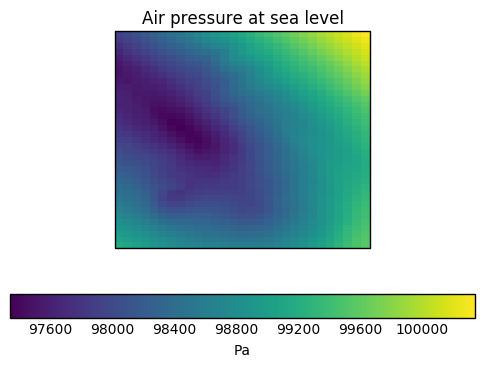

In [13]:
qplt.pcolormesh(g_pressure_uk, cmap='viridis')

/opt/conda/lib/python3.5/site-packages/iris/coords.py:802: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))
/opt/conda/lib/python3.5/site-packages/iris/coords.py:802: UserWarning: Coordinate 'latitude' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))


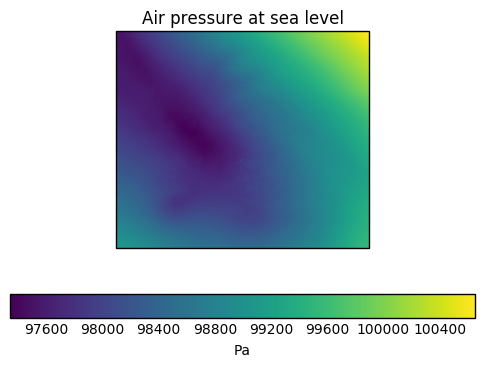

In [14]:
qplt.pcolormesh(uk_unrotate, cmap='viridis')

In [15]:
scheme=iris.analysis.Nearest()

g_regrid = g_pressure_uk.regrid(grid=uk_unrotate, scheme=scheme)
uk_regrid = uk_unrotate.regrid(grid=g_pressure_uk, scheme=scheme)

In [16]:
print(uk_pressure.collapsed(uk_pressure.coords(), iris.analysis.MAX).data)
print(uk_regrid.collapsed(uk_regrid.coords(), iris.analysis.MAX).data)
print('')
print(uk_pressure.collapsed(uk_pressure.coords(), iris.analysis.MIN).data)
print(uk_regrid.collapsed(uk_regrid.coords(), iris.analysis.MIN).data)
print('')

print(g_pressure_uk.collapsed(g_pressure_uk.coords(), iris.analysis.MAX).data)
print(g_regrid.collapsed(g_regrid.coords(), iris.analysis.MAX).data)
print('')
print(g_pressure_uk.collapsed(g_pressure_uk.coords(), iris.analysis.MIN).data)
print(g_regrid.collapsed(g_regrid.coords(), iris.analysis.MIN).data)

100652.0
100637.0

97342.0
97363.0

100343.0
100343.0

97339.0
97339.0


/opt/conda/lib/python3.5/site-packages/iris/coords.py:992: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'grid_latitude'.
  warnings.warn(msg.format(self.name()))
/opt/conda/lib/python3.5/site-packages/iris/coords.py:992: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'grid_longitude'.
  warnings.warn(msg.format(self.name()))
/opt/conda/lib/python3.5/site-packages/iris/coords.py:992: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'latitude'.
  warnings.warn(msg.format(self.name()))
/opt/conda/lib/python3.5/site-packages/iris/coords.py:992: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'longitude'.
  warnings.warn(msg.format(self.name()))


/opt/conda/lib/python3.5/site-packages/iris/coords.py:802: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))
/opt/conda/lib/python3.5/site-packages/iris/coords.py:802: UserWarning: Coordinate 'latitude' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))


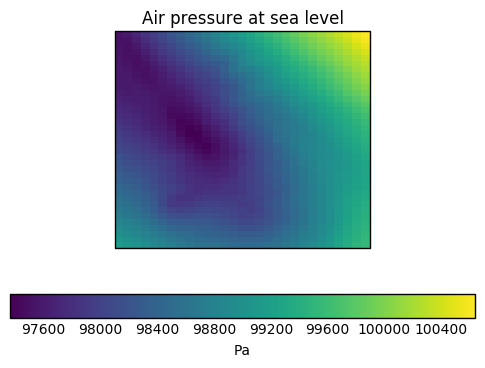

In [17]:
qplt.pcolormesh(uk_regrid, cmap='viridis')

/opt/conda/lib/python3.5/site-packages/iris/coords.py:802: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))
/opt/conda/lib/python3.5/site-packages/iris/coords.py:802: UserWarning: Coordinate 'latitude' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))


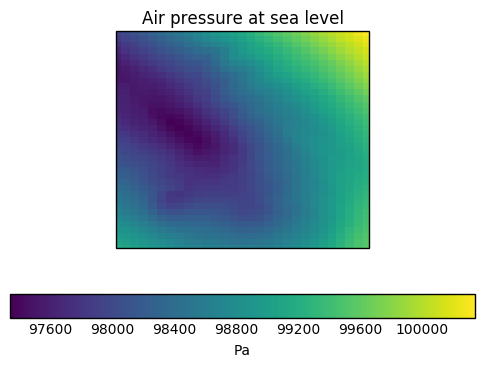

In [18]:
qplt.pcolormesh(g_regrid, cmap='viridis')

In [19]:
diff_lr = g_pressure_uk - uk_regrid
diff_hr = g_regrid - uk_unrotate

/opt/conda/lib/python3.5/site-packages/iris/coords.py:802: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))
/opt/conda/lib/python3.5/site-packages/iris/coords.py:802: UserWarning: Coordinate 'latitude' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))


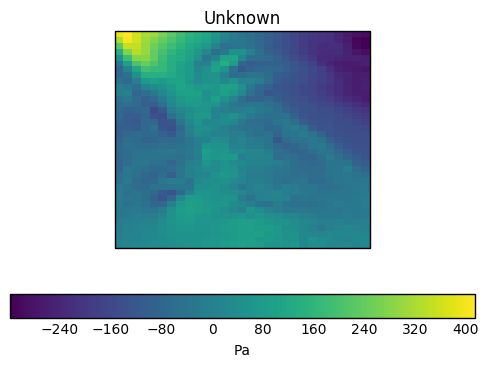

In [20]:
qplt.pcolormesh(diff_lr, cmap='viridis')

/opt/conda/lib/python3.5/site-packages/iris/coords.py:802: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))
/opt/conda/lib/python3.5/site-packages/iris/coords.py:802: UserWarning: Coordinate 'latitude' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))


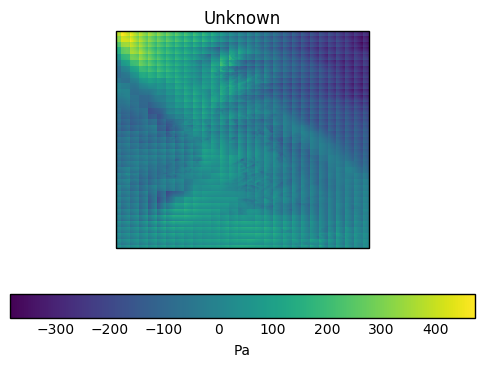

In [21]:
qplt.pcolormesh(diff_hr, cmap='viridis')

In [22]:
diff_hr.collapsed(['latitude', 'longitude'], iris.analysis.RMS).data

/opt/conda/lib/python3.5/site-packages/iris/cube.py:3254: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/opt/conda/lib/python3.5/site-packages/iris/coords.py:992: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'latitude'.
  warnings.warn(msg.format(self.name()))
/opt/conda/lib/python3.5/site-packages/iris/coords.py:992: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'longitude'.
  warnings.warn(msg.format(self.name()))


array(111.45568295655093)

In [23]:
diff_lr.collapsed(['latitude', 'longitude'], iris.analysis.RMS).data

/opt/conda/lib/python3.5/site-packages/iris/cube.py:3254: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/opt/conda/lib/python3.5/site-packages/iris/coords.py:992: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'latitude'.
  warnings.warn(msg.format(self.name()))
/opt/conda/lib/python3.5/site-packages/iris/coords.py:992: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'longitude'.
  warnings.warn(msg.format(self.name()))


array(109.34442449748377)